## Measures of Central Tendency & Measures of Spread

Task:  
Measures of central tendency, measures of spread
You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Perform following measures, detect and remove outliers using IQR  
1. Mean Function   
2. Percentile method   
3. IQR(Inter quartile range method)   
4. Normal distribution   
5. Zscore method

Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.

In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis, zscore
%matplotlib inline

In [274]:
df = pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [276]:
df.drop(columns='size', inplace= True)

In [277]:
df.price_per_sqft.describe().round(2)

count       13200.00
mean         7920.34
std        106727.16
min           267.00
25%          4267.00
50%          5438.00
75%          7317.00
max      12000000.00
Name: price_per_sqft, dtype: float64

#### Mean Function

In [278]:
df.price_per_sqft.mean().round(2)

7920.34

#### Percentile Method

In [279]:
q1, q2, q3 = df.price_per_sqft.quantile([0.25, 0.50, 0.75])
print("q1 = {}, q2 = {}, q3 = {}".format(q1, q2, q3))

q1 = 4267.0, q2 = 5438.0, q3 = 7317.0


#### IQR(Inter quartile range method)

In [280]:
IQR = q3 - q1
print("IQR = ", IQR)

IQR =  3050.0


In [281]:
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print("Lower_Whisker = {} ,Upper_Whisker = {} ". format(lower, upper))

Lower_Whisker = -308.0 ,Upper_Whisker = 11892.0 


In [282]:
outliers = df[(df.price_per_sqft<lower) | (df.price_per_sqft>upper)].price_per_sqft.count()
print("Total No. Rows with outliers = ", outliers)

Total No. Rows with outliers =  1265


In [283]:
df_without_outlier = df[(df['price_per_sqft']>lower)&(df['price_per_sqft']<upper)]
df_without_outlier

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407


#### Normal Distribution

In [284]:
df['price_per_sqft'].skew()

108.28105529705168

In [285]:
df['price_per_sqft'].kurtosis()

12095.21502832288

In [286]:
df['log_price_per_sqft'] = np.log(np.log(np.log(np.log(df['price_per_sqft']))))

print(df['log_price_per_sqft'].skew())
print(kurtosis(df['log_price_per_sqft'], fisher=False))

0.38445692103279827
6.956141009106911


In [287]:
df['zscore'] = stats.zscore(df['log_price_per_sqft'])
df_new = df[(df['zscore']>-3) & (df['zscore']<3)]

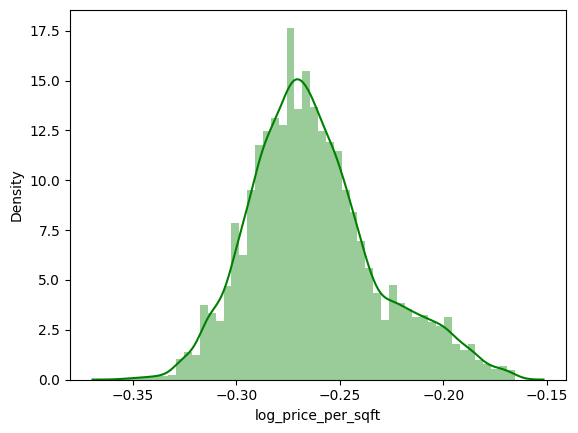

In [288]:
import warnings
warnings.simplefilter(action='ignore')
sns.distplot(df_new['log_price_per_sqft'], color='g')
plt.show()

In [289]:
df_new['log_price_per_sqft'].describe().round(2)

count    13132.00
mean        -0.26
std          0.03
min         -0.36
25%         -0.28
50%         -0.27
75%         -0.25
max         -0.17
Name: log_price_per_sqft, dtype: float64

#### Z Score

In [290]:
df['zscore'] = stats.zscore(df['log_price_per_sqft'])

In [291]:
df_new = df[(df['zscore']>-3) & (df['zscore']<3)]
df_new 

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,-0.294613,-0.986961
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,-0.277919,-0.473294
2,Uttarahalli,1440.0,2.0,62.00,3,4305,-0.283066,-0.631660
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,-0.256520,0.185115
4,Kothanur,1200.0,2.0,51.00,2,4250,-0.284027,-0.661246
...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,-0.251873,0.328121
13196,other,3600.0,5.0,400.00,4,11111,-0.219695,1.318194
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,-0.268499,-0.183447
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,-0.223645,1.196659


#### Histplot   (To check Noramlity of 'price_per_sqft' column)

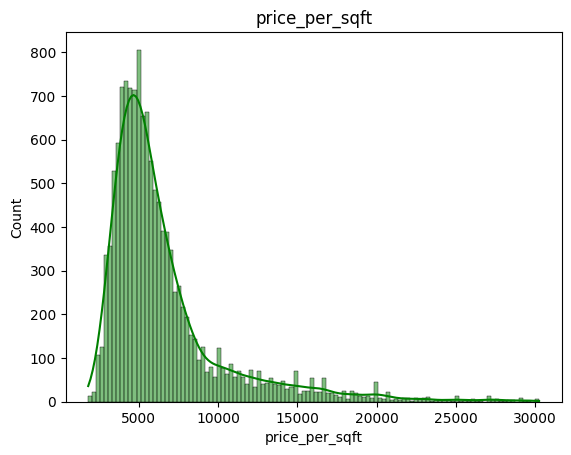

In [292]:
sns.histplot(df_new['price_per_sqft'], color='g', kde=True)
plt.title('price_per_sqft')
plt.show()

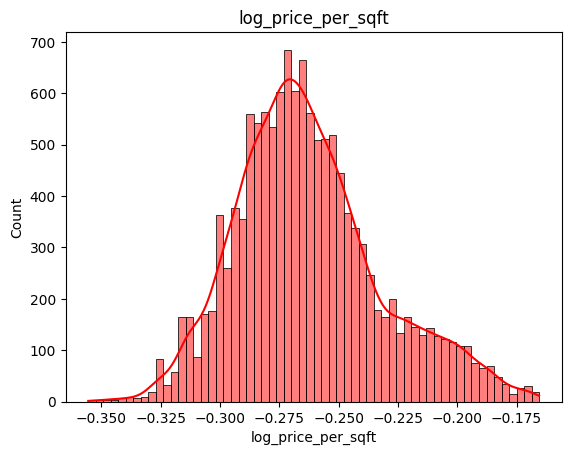

In [293]:
sns.histplot(df_new['log_price_per_sqft'], color='r', kde=True)
plt.title('log_price_per_sqft')
plt.show()

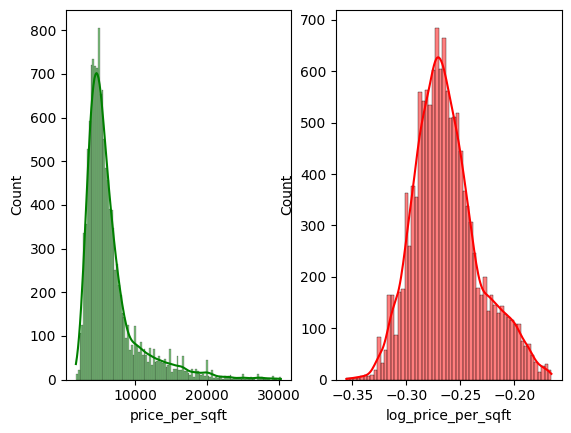

In [294]:
plt.subplot(1, 2, 1)
sns.histplot(df_new['price_per_sqft'], color='g', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df_new['log_price_per_sqft'], color='r', kde=True)

plt.show()

#### Box Plot

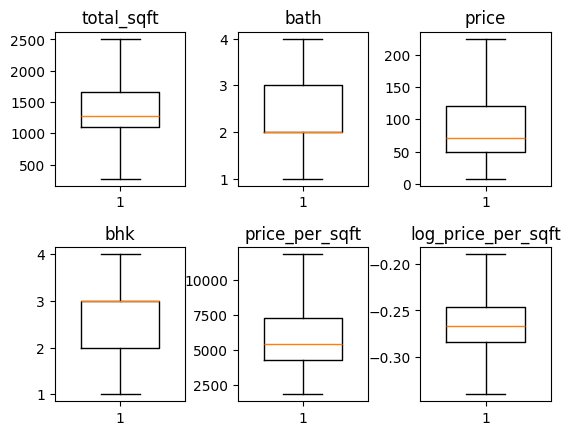

In [295]:
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 3, 1)
plt.boxplot(df_new.total_sqft, widths=(0.6), showfliers=False)
plt.title('total_sqft')

plt.subplot(2, 3, 2)
plt.boxplot(df_new.bath, widths=(0.6), showfliers=False)
plt.title('bath')

plt.subplot(2, 3, 3)
plt.boxplot(df_new.price, widths=(0.6), showfliers=False)
plt.title('price')

plt.subplot(2, 3, 4)
plt.boxplot(df_new.bhk, widths=(0.6), showfliers=False)
plt.title('bhk')

plt.subplot(2, 3, 5)
plt.boxplot(df_new.price_per_sqft, widths=(0.6), showfliers=False)
plt.title('price_per_sqft')

plt.subplot(2, 3, 6)
plt.boxplot(df_new.log_price_per_sqft, widths=(0.6), showfliers=False)
plt.title('log_price_per_sqft')

plt.show()

#### Correlation

In [296]:
corr = df_new.corr(numeric_only=True)
corr

,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
total_sqft,1.000000,0.491123,0.768181,0.427326,0.228307,0.249036,0.249036
bath,0.491123,1.000000,0.474868,0.897697,0.454566,0.439438,0.439438
price,0.768181,0.474868,1.000000,0.416223,0.658709,0.597411,0.597411
bhk,0.427326,0.897697,0.416223,1.000000,0.444290,0.413753,0.413753
price_per_sqft,0.228307,0.454566,0.658709,0.444290,1.000000,0.923189,0.923189
log_price_per_sqft,0.249036,0.439438,0.597411,0.413753,0.923189,1.000000,1.000000
zscore,0.249036,0.439438,0.597411,0.413753,0.923189,1.000000,1.000000


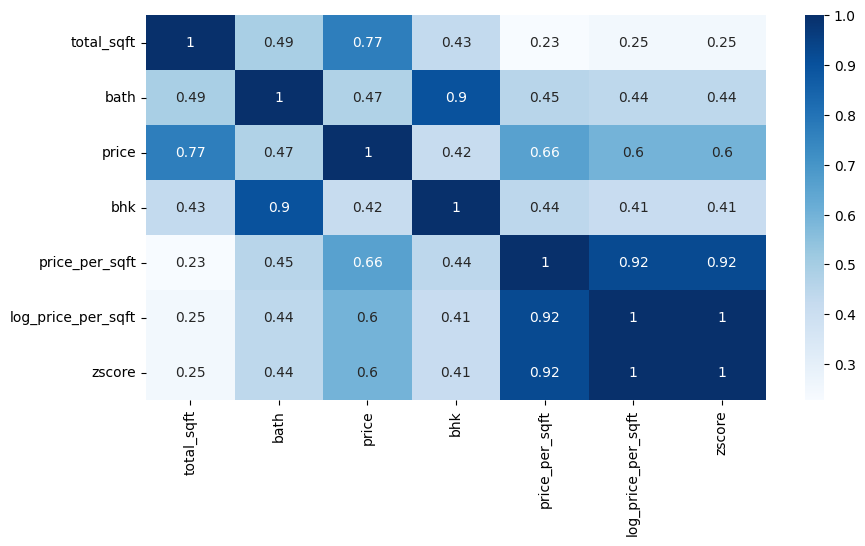

In [297]:
plt.figure(figsize=(10, 5))
corr = df_new.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.cm.Reds
plt.show()

#### Scatter Plot

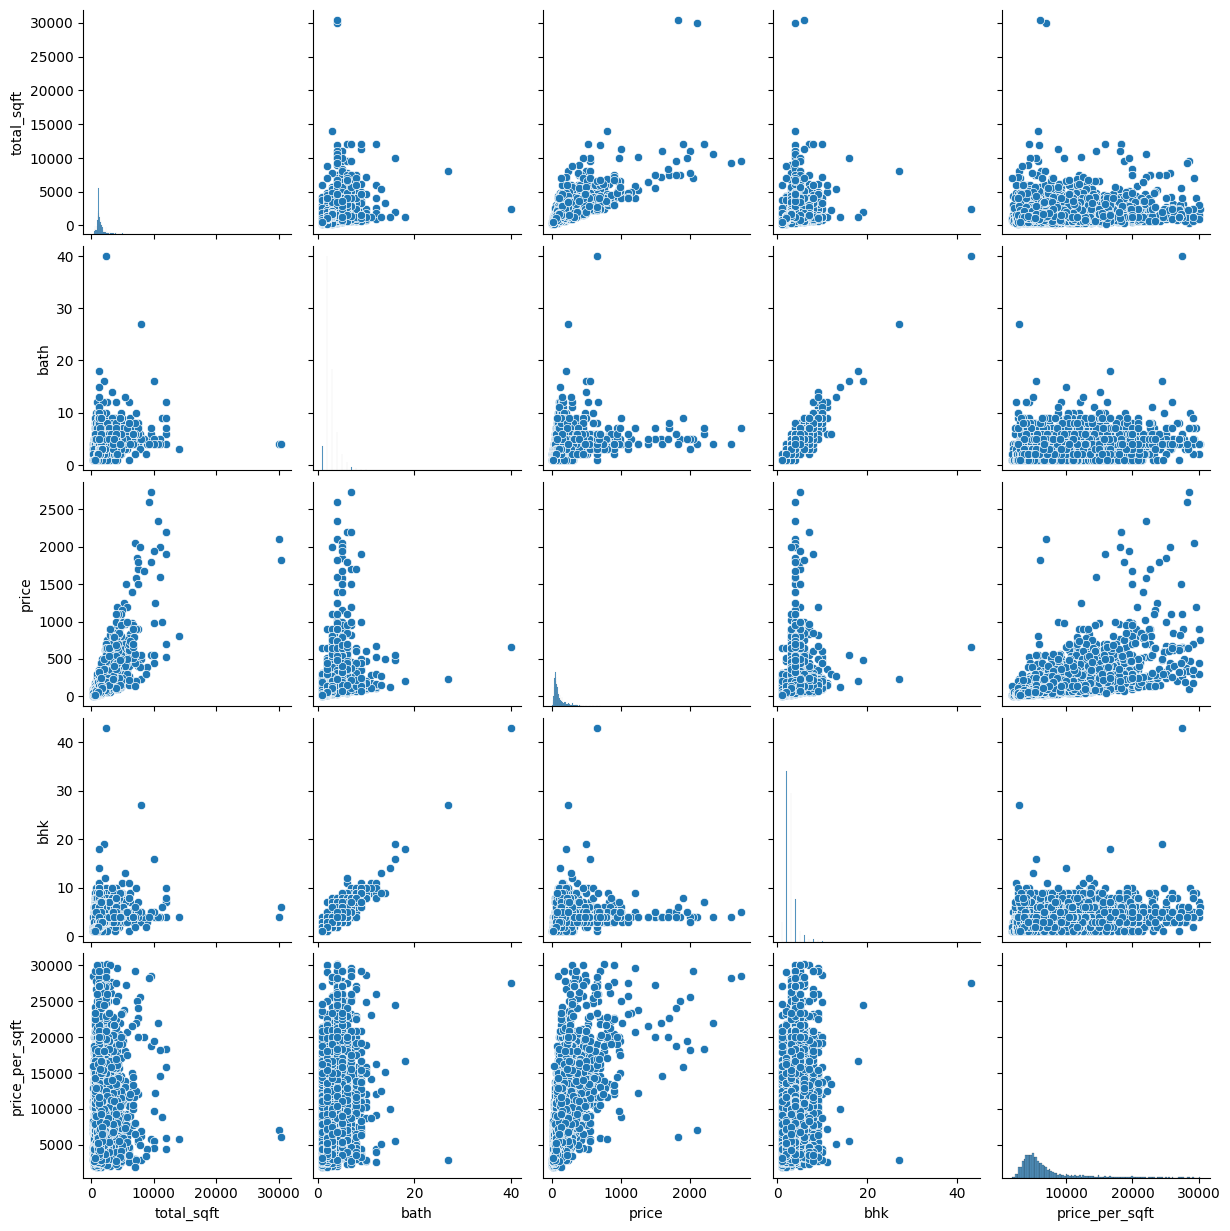

In [299]:
df_updated=df_new.drop(['log_price_per_sqft', 'zscore'], axis='columns')
sns.pairplot(df_updated, diag_kind='hist')
plt.show()